Коэффициенты регрессии b_0, b_1: 1.06 0.9927272727272727,
коэффициент корреляции: 0.9988235670852299 
Дисперсия D1: 0.02395454545454547
Отношение дисперсий (D1/S^2): 0.2395454545454547, 
Значение критерия Фишера 2.4470637479798225

Заметим, что значение отношения дисперсий в 10 раз меньше значения критерия Фишера.
Таким образом, поправка к регрессии не требуется, так как разница между дисперсиями не значима 

Значения полученные через уравнение регрессии: 
[2.0527272727272727, 3.0454545454545454, 4.038181818181818, 5.030909090909091, 6.0236363636363635, 7.016363636363636, 8.00909090909091, 9.001818181818182, 9.994545454545454, 10.987272727272726]


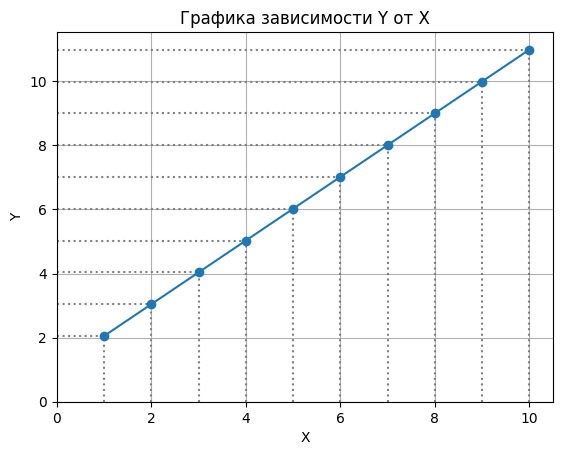

None
--------------------------------------------
Новые данные: [2.0240000000000005, 3.658, 3.772, 5.05, 5.046, 7.383000000000001, 8.813999999999998, 9.18, 11.628, 9.102]
Коэффициенты регрессии b_0, b_1: 1.2269999999999974 0.9706727272727281,
коэффициент корреляции: 0.9501055985672284 
Дисперсия D1: 1.0473113454545449
Отношение дисперсий (D1/S^2): 10.473113454545448, 
Значение критерия Фишера 2.4470637479798225

Значения полученные через уравнение регрессии: 
[2.1976727272727254, 3.1683454545454537, 4.139018181818182, 5.10969090909091, 6.080363636363638, 7.051036363636366, 8.021709090909095, 8.992381818181823, 9.96305454545455, 10.933727272727278]


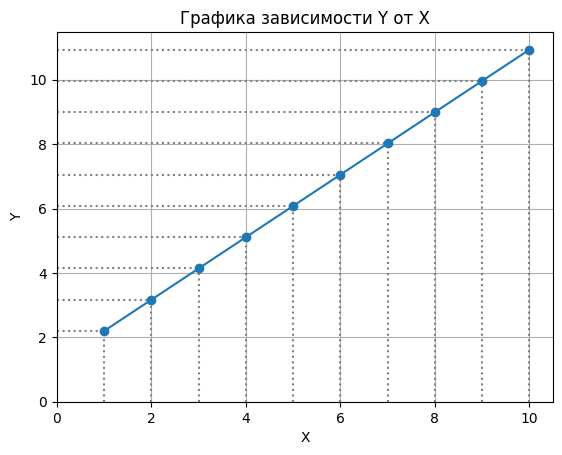

None


In [4]:
import math
import scipy.stats as sc
import matplotlib.pyplot as plt
import random

from scipy.linalg import sqrtm

x = [i for i in range(1, 11)]
y = [2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1]
p = 0.05
s_2 = 0.1
n_s_2 = 20
y_2 = []

class LinearRegression:
    x_array = [int|float]
    y_array = [int|float]
    b_0 = float
    b_1 = float
    r = float
    dof = int
    d_1 = float
    p = float
    s_2 = float

    def __init__(self, x_array:[int|float], y_array:[int|float], p:float, s_2:float, dof:int=2):
        self.x_array = x_array
        self.y_array = y_array
        self.dof = dof
        self.p = p
        self.s_2 = s_2
        self.b_0, self.b_1, self.r = self.calc_odds_regression()
        self.d_1 = self.calc_d1()

    def calc_odds_regression(self) -> (float, float, float):
        x, y = self.x_array, self.y_array
        n = len(x)
        sum_x_2 = sum(x[i] ** 2 for i in range(n))
        multiply_x_y= sum(x[i] * y[i] for i in range(n))
        sum_y_i = sum(y[i] for i in range(n))
        sum_x_i = sum(x[i] for i in range(n))
        b_0 = (((sum_y_i * sum_x_2) - (multiply_x_y * sum_x_i)) /
               (n * sum_x_2 - sum_x_i * sum_x_i))
        b_1 = (((sum_x_i * sum_y_i) - (multiply_x_y * n)) /
               (sum_x_i * sum_x_i - n * sum_x_2))

        x_mean, y_mean = sum(x) / n, sum(y) / n
        sigma_x = math.sqrt(sum((x[i] - x_mean) ** 2 for i in range(len(x))))
        sigma_y = math.sqrt(sum((y[i] - y_mean) ** 2 for i in range(len(y))))

        r = b_1 * sigma_x / sigma_y

        return b_0, b_1, r

    def linear_regression(self, x:int|float) -> float:
        return self.b_0 + self.b_1 * x

    def calc_d1(self) -> float:
        n = len(self.y_array)
        x, y = self.x_array, self.y_array
        sum_of_difference = sum((y[i] - (self.linear_regression(x[i]))) ** 2
                                for i in range(n))

        return 1 / (n - self.dof) * sum_of_difference

    def comparison_disp(self) -> (float, float):
        f = self.d_1 / self.s_2
        fisher = sc.f.ppf(1 - p, len(self.x_array) - self.dof, n_s_2)

        return f, fisher

    def plot(self):
        y = [self.linear_regression(x) for x in self.x_array]
        print(f"Значения полученные через уравнение регрессии: \n{y}")

        for i in range(len(self.x_array)):
            plt.vlines(self.x_array[i], ymin=0, ymax=y[i], color='gray', linestyles='dotted')
            plt.hlines(y[i], xmin=0, xmax=self.x_array[i], color='gray', linestyles='dotted')

        plt.plot(self.x_array, y, marker='o')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Графика зависимости Y от X")
        plt.xlim(left=0)
        plt.ylim(bottom=0)
        plt.grid()
        plt.show()


lr = LinearRegression(x, y, p, s_2)
f, fisher = lr.comparison_disp()

print(f"Коэффициенты регрессии b_0, b_1: {lr.b_0} {lr.b_1},\nкоэффициент корреляции: {lr.r} ")
print(f"Дисперсия D1: {lr.d_1}")
print(f"Отношение дисперсий (D1/S^2): {f}, \nЗначение критерия Фишера {fisher}\n")
print("Заметим, что значение отношения дисперсий в 10 раз меньше значения критерия Фишера.\n"
      "Таким образом, поправка к регрессии не требуется, так как разница между дисперсиями не значима \n")
print(lr.plot())

print("--------------------------------------------")
# print("Заметим, что разница между значениями, полученными через уравнение регрессии,"
#       "и исходными значениями мала, таким образом уравнение регрессии может быть "
#       "использовано в пределах исходных данных")


for _ in range(len(y)):
    rand = random.randrange(-20, 20)
    y_delta = 1 + rand / 100
    y_2.append(y[_] * y_delta)

print(f"Новые данные: {y_2}")
lr_2 = LinearRegression(x, y_2, p, s_2)
f, fisher = lr_2.comparison_disp()

print(f"Коэффициенты регрессии b_0, b_1: {lr_2.b_0} {lr_2.b_1},\nкоэффициент корреляции: {lr_2.r} ")
print(f"Дисперсия D1: {lr_2.d_1}")
print(f"Отношение дисперсий (D1/S^2): {f}, \nЗначение критерия Фишера {fisher}\n")
print(lr_2.plot())